
#  Корреляции


In [ ]:
x = [1, 5, 2, 4, 900] -> rang(x) = [1, 4, 2, 3, 5]
y = [4, 2, 0, 1, 5] -> rang(y) = [4, 3, 1, 2, 5]

x_i -> rang(xi)
[x1, x2, ... xn] -> [rang(x1), ..., rang(xn)]
rang(xi) = позиция xi в отсортированном  ряду x(1) < ... < x(n) 

x: 1 < 2 < 4 < 5 < 900
y: 0 < 1 < 2 < 4 < 5


пирсон: (e(xy) - ex * ey) / sqrt(dx * dy)
спирмен: пирсон(rang(x), rang(y))

In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline

Будем использовать небольшой набор данных по тому, как люди платят чаевые. 

In [3]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.shape

(244, 7)

In [7]:
# новая переменная - процент чаевых от счёта
df['tip_pct'] = (100 * df['tip'] / df['total_bill']).round(2)

In [8]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


In [10]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

__Посмотрим как между собой ваимосвязаны счёт, чаевые и пол клиента.__ 

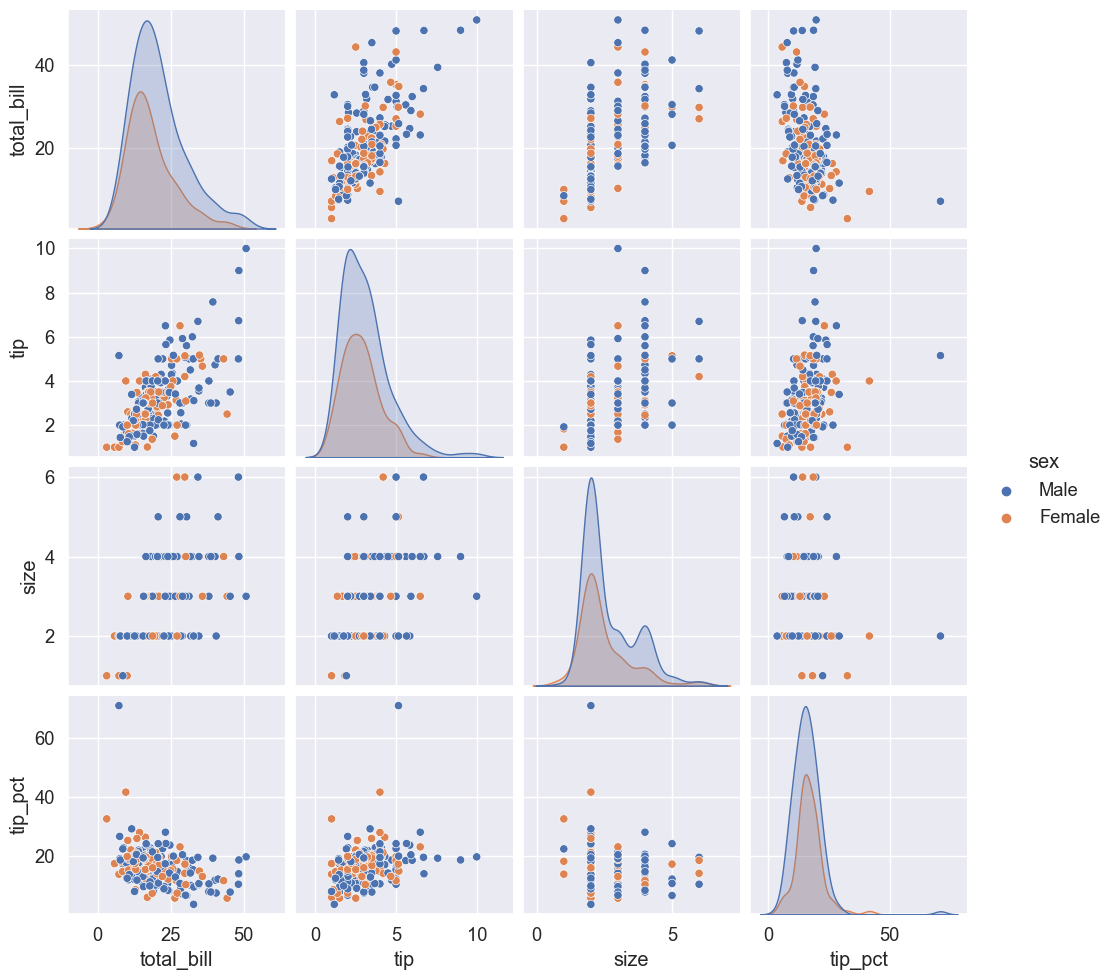

In [35]:
# plt.figure(figsize=(10, 6))
sns.pairplot(df, hue='sex', height=2.5, kind='scatter'); # kind = 'reg'

- Видно, что общий счёт и величина чаевых зависят друг от друга: чем больше счёт, тем больше чаевых оставляют, с долей (`tip_pct`) подобной взаимосвязи не видно 
- Пол никак не влияет на то, какое количество чаевых оставлено, красные и синие точки на графиках распределены равномерно, плотности на диагонали выглядят похожим образом. 

__Посмотрим на разбиение по дням недели.__

In [ ]:
Q25, Q75: 
    

In [36]:
x = np.random.normal(0, 1, size=10000)

In [41]:
np.percentile(x, q=[25, 50, 75])

array([-0.68001755, -0.0087494 ,  0.66481148])

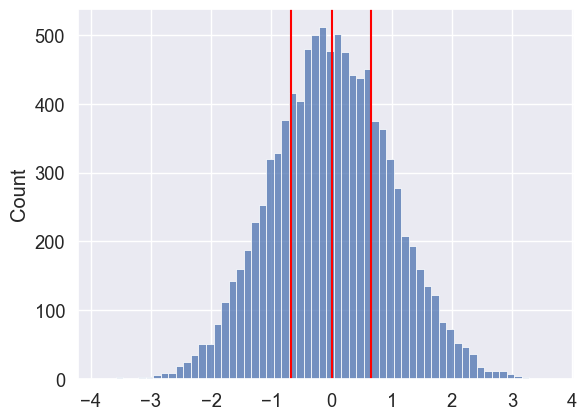

In [42]:
sns.histplot(x)
plt.axvline(-0.68, color='red')
plt.axvline(0, color='red')
plt.axvline(0.66, color='red')

In [ ]:
IQR = Q3 - Q1

Q1 - 1.5*IQR < min

Q3 + 1.5IQR > max

(Q1-1.5IQR; Q3+1.5IQR)

In [12]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05


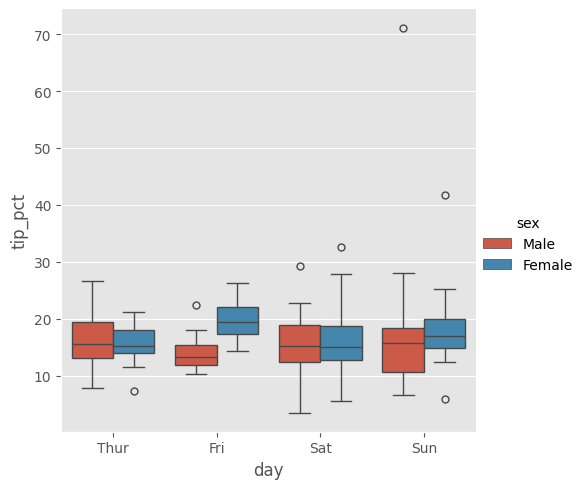

In [13]:
sns.catplot(data=df, x="day", y="tip_pct", hue="sex", kind="box");

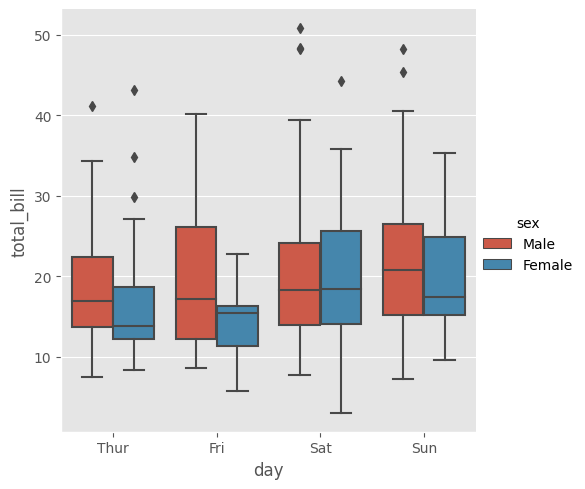

In [16]:
sns.catplot(data=df, x="day", y="total_bill", hue="sex", kind="box");

- Почему-то в пятницу мужчины платят больше чаевых, чем женщины. Возможно, что это как-то связано с пятничными свиданиями . Но правда ли это так?

__Давайте посмотрим сколько наблюдений приходится на какой день недели.__ 

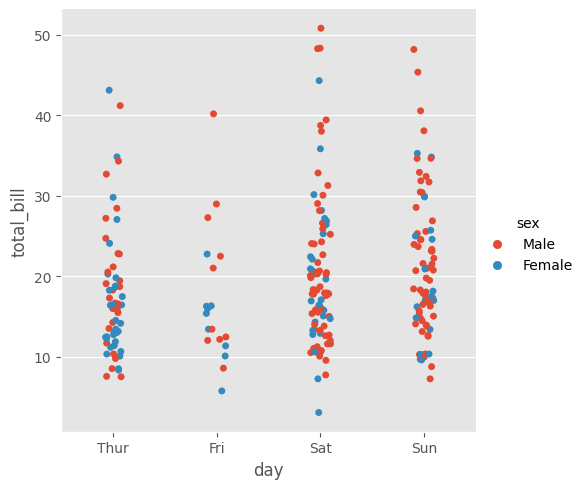

In [17]:
sns.catplot(data=df, x="day", y="total_bill", hue="sex");

- Более подробный взгляд на данные показывает, что это связано с тем, что в выборке мало данных с пятницы. Из-за этого мы видим такую разницу между чаевыми. 
- В будущем мы будем говорить про статистические тесты. Они будут помогать нам отличать случайную разницу, как в этом примере, от настоящей. 

__Можно посмотреть на взаимосвязь только двух переменных.__

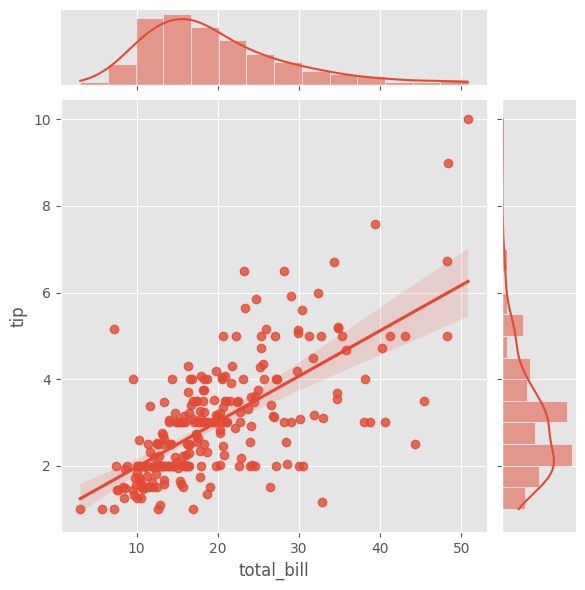

In [19]:
sns.jointplot(data=df, x="total_bill", y="tip", kind='reg');

- Снова видим, что чем больше общий счёт, тем большую сумму оставляют в качестве чаевых. Хочется провести сквозь точки линию регрессии. 

__Посмотрим на ковариационную матрицу.__

In [20]:
df.corr(method='pearson', numeric_only=True).round(2)

,total_bill,tip,size,tip_pct
total_bill,1.00,0.68,0.60,-0.34
tip,0.68,1.00,0.49,0.34
size,0.60,0.49,1.00,-0.14
tip_pct,-0.34,0.34,-0.14,1.00


In [22]:
df.corr(method='spearman', numeric_only=True).round(2)

,total_bill,tip,size,tip_pct
total_bill,1.00,0.68,0.60,-0.32
tip,0.68,1.00,0.47,0.40
size,0.60,0.47,1.00,-0.15
tip_pct,-0.32,0.40,-0.15,1.00


Можно визуализировать матрицу с помощью тепловой карты. 

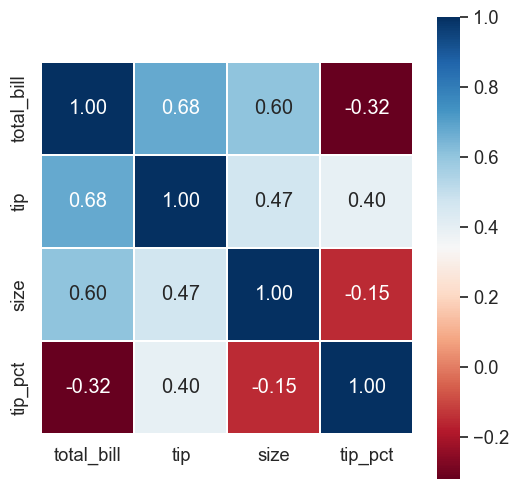

In [26]:
sns.set(font_scale=1.2)
plt.subplots(figsize=(6, 6))
sns.heatmap(
    df.corr(method='spearman', numeric_only=True),
    square=True,
    annot=True, 
    fmt=".2f", 
    linewidths=0.1, 
    cmap="RdBu"
);

- Видно, что корреляция Спирмэна и Пирсона не сильно отличаются друг от друга в нашем примере. Это связано с тем, что взаимосвязи в данных линейные. 



Корреляция Спирмэна - это корреляция Пирсона, которую посчитали между рангами. 

In [31]:
x = np.array([10, 8, 6, 7, 4, 10, 9, 5])
y = np.array([9, 9, 4, 5, 6, 8, 10, 7])
stats.spearmanr(x,y).correlation, stats.pearsonr(x,y)[0]

(0.644578313253012, 0.661879276575521)

In [30]:
rx = np.array([7.5, 5, 3, 4, 1, 7.5, 6, 2])
ry = np.array([6.5, 6.5, 1, 2, 3, 5, 8, 4])
stats.pearsonr(rx,ry)[0] # == корреляция спирмена 

0.6445783132530122